In [1]:
# Import required dependencies
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the list of stock symbols in your portfolio
portfolio_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

In [3]:
# Set the date range for historical data
start_date = '2018-01-01'
end_date = '2023-12-31'

In [4]:
# Download historical stock data
portfolio_data = yf.download(portfolio_symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


# Portfolio Statistics

In [5]:
# Calculate daily returns
portfolio_returns = portfolio_data.pct_change().dropna()

In [6]:
# Calculate portfolio weights (assuming equal weights for simplicity)
num_stocks = len(portfolio_symbols)
weights = np.array([1 / num_stocks] * num_stocks)

In [7]:
# Calculate portfolio returns and volatility
portfolio_return = np.sum(portfolio_returns.mean() * weights) * 252  # 252 trading days in a year
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(portfolio_returns.cov() * 252, weights)))

In [8]:
# Maximum Drawdown
cumulative_returns = (1 + portfolio_returns).cumprod()
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

In [9]:
# Calculate additional statistics
portfolio_std = portfolio_returns.std() * np.sqrt(252)  # Annualized standard deviation
portfolio_annualized_returns = portfolio_returns.mean() * 252  # Annualized returns

# Calculate rolling statistics (e.g., 30-day rolling returns and volatility)
rolling_returns = portfolio_returns.rolling(window=30).mean()
rolling_volatility = portfolio_returns.rolling(window=30).std() * np.sqrt(252)

# Calculate portfolio VaR and CVaR at a 95% confidence level
confidence_level = 0.95
var_95 = portfolio_returns.quantile(1 - confidence_level)
cvar_95 = portfolio_returns[portfolio_returns <= var_95].mean()

In [10]:
# Calculate the Sharpe ratio (assuming risk-free rate of 0% for simplicity)
risk_free_rate = 0.0
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

In [11]:
# Print portfolio statistics
print("Portfolio Statistics:")
print("__________________________________________________")
print(f"Annualized Return: {portfolio_return:.2%}")
print("__________________________________________________")
print(f"Annualized Volatility: {portfolio_volatility:.2%}")
print("__________________________________________________")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print("__________________________________________________")
print(f"Maximum Drawdown: \n{max_drawdown}")
print("__________________________________________________")
print(f"Annualized Standard Deviation: \n{portfolio_std}")
print("__________________________________________________")
print(f"Annualized Returns: \n{portfolio_annualized_returns}")
print("__________________________________________________")
print(f"Value at Risk (VaR) at 95% confidence: \n{var_95}")
print("__________________________________________________")
print(f"Conditional Value at Risk (CVaR) at 95% confidence: \n{cvar_95}")
print("__________________________________________________")

Portfolio Statistics:
__________________________________________________
Annualized Return: 33.58%
__________________________________________________
Annualized Volatility: 31.37%
__________________________________________________
Sharpe Ratio: 1.07
__________________________________________________
Maximum Drawdown: 
AAPL    -0.385159
AMZN    -0.561453
GOOGL   -0.443201
MSFT    -0.371485
TSLA    -0.736322
dtype: float64
__________________________________________________
Annualized Standard Deviation: 
AAPL     0.323034
AMZN     0.356274
GOOGL    0.314173
MSFT     0.305777
TSLA     0.646180
dtype: float64
__________________________________________________
Annualized Returns: 
AAPL     0.317179
AMZN     0.208659
GOOGL    0.211511
MSFT     0.297594
TSLA     0.643933
dtype: float64
__________________________________________________
Value at Risk (VaR) at 95% confidence: 
AAPL    -0.031535
AMZN    -0.034318
GOOGL   -0.030628
MSFT    -0.029330
TSLA    -0.062261
Name: 0.050000000000000044, d

**Annualized Return:** This represents the average annual return on the portfolio. In this case, it's calculated based on historical data from 2018 to 2023.

**Annualized Volatility:** This indicates the annualized standard deviation of the portfolio returns, which measures the risk or variability of the portfolio's performance.

**Sharpe Ratio:** The Sharpe ratio measures the risk-adjusted return of the portfolio. A higher Sharpe ratio generally indicates better risk-adjusted performance.

**Maximum Drawdown:** This measures the largest loss the portfolio experienced from a peak to a trough.

**Annualized Standard Deviation:** This is another measure of the risk in the portfolio.

**Annualized Returns:** The annualized average return, which can be compared with other investment opportunities.

**Value at Risk (VaR) at 95% confidence:** This represents the potential maximum loss at a 95% confidence level.

**Conditional Value at Risk (CVaR) at 95% confidence:** CVaR measures the expected loss beyond VaR.

# Cumulative Returns Plot

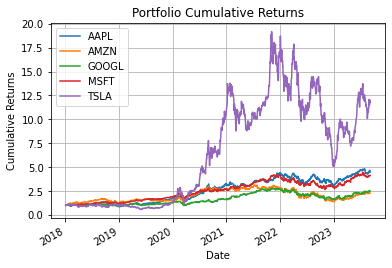

In [12]:
# Plot the cumulative portfolio returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot()
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Portfolio Cumulative Returns")
plt.grid(True)

# Save the plot as an image
plt.savefig('./Images/PortfolioCumulativeReturns')

plt.show()

This plot shows the cumulative growth of the portfolio over time. You can visually assess how the portfolio has performed and identify periods of growth or decline.

By observing the direction of the curve (upward, downward, or flat), you can identify trends in the portfolio's performance. A consistently upward-sloping curve indicates a growing portfolio, while a downward trend suggests losses.

Sudden fluctuations or steep drops in the curve may indicate periods of high volatility and risk in the portfolio. These events can be further investigated to understand the underlying causes

# Custom Portfolio Statistics

In [13]:
# Customize portfolio allocation (weights)
# Example weights, customize as needed
custom_weights = [0.3, 0.25, 0.2, 0.15, 0.1] 

In [14]:
# Calculate portfolio returns and volatility with custom weights
portfolio_return = np.sum(portfolio_returns.mean() * custom_weights) * 252
portfolio_volatility = np.sqrt(np.dot(custom_weights, np.dot(portfolio_returns.cov() * 252, custom_weights)))

In [15]:
# Calculate the Sharpe ratio with the risk-free rate
# Example risk-free rate (2%)
risk_free_rate = 0.02  
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

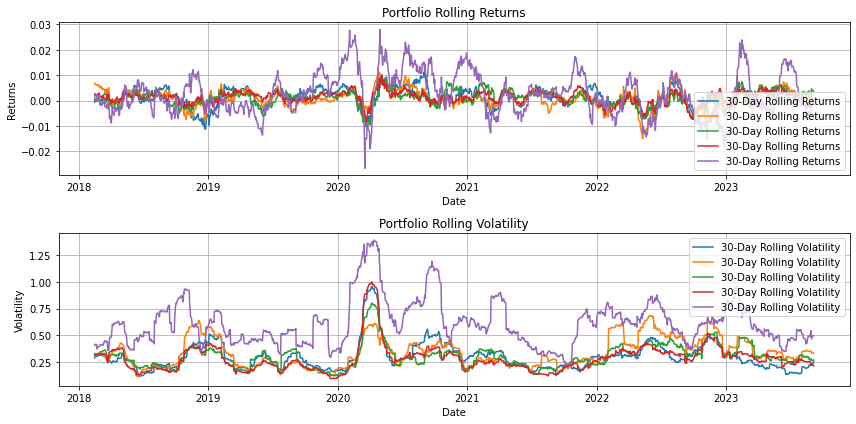

In [16]:
# Plot rolling returns and volatility
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(rolling_returns, label="30-Day Rolling Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Portfolio Rolling Returns")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(rolling_volatility, label="30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Portfolio Rolling Volatility")
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as an image
plt.savefig('./Images/PortfolioRollingReturnsVolatility')


plt.show()

**Rolling Returns:** These plots show the average returns over a rolling 30-day period. It can help identify trends or patterns in the portfolio's performance. You can identify short-term trends and fluctuations in performance. For example, periods of positive rolling returns indicate short-term gains, while negative trends suggest losses.

**Rolling Volatility:** These plots show the rolling 30-day volatility, giving insight into how the risk of the portfolio changes over time. You can identify periods of elevated volatility, which may be associated with increased risk or uncertainty in the markets.

---

**Performance Comparison:** You can compare the patterns in rolling returns and rolling volatility across different time periods. For example, you might notice that high volatility often coincides with periods of lower returns, indicating a potential relationship between risk and reward.

**Risk Management:** Spikes in rolling volatility can serve as early warning signs of potential market turbulence. If you observe a sharp increase in volatility, it may prompt you to review your risk management strategies or consider adjustments to your portfolio.

**Market Regimes:** Changes in the patterns of rolling returns and volatility can indicate shifts in market regimes. For instance, a prolonged period of declining rolling returns and rising rolling volatility might signal a bear market or economic downturn.

**Investment Timing:** These plots can help you evaluate the timing of your investments or trading decisions. You may identify instances where you entered or exited the market during favorable or unfavorable conditions.

**Risk Assessment:** Understanding the relationship between rolling returns and rolling volatility can assist in assessing the risk-return profile of your portfolio. A stable upward trend in returns with low volatility is generally desirable.

**Historical Patterns:** You can observe historical patterns and use them to inform your future investment strategies. For instance, if you notice that volatility tends to spike during certain months or seasons, you can prepare accordingly.

Overall, the "Rolling Returns and Volatility" visualization helps you monitor short-term performance dynamics, assess risk, and make informed decisions about your portfolio, trading strategies, and risk management. It is a useful tool for both active and passive investors to stay informed about the ever-changing dynamics of financial markets.

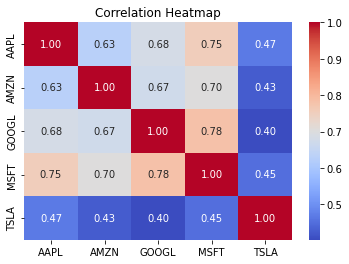

In [17]:
# Plot the correlation heatmap
correlation_matrix = portfolio_returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

# Save the plot as an image
plt.savefig('./Images/CorrelationHeatmap')

plt.show()

**Correlation Heatmap:** This heatmap visualizes the correlation between the daily returns of the portfolio assets. It helps you understand how assets move in relation to each other. Negative correlations can be diversification opportunities.

**Correlation Strength:** The heatmap's colors represent the strength and direction of correlations between assets. Positive correlations are shown in warmer colors (e.g., red), while negative correlations are displayed in cooler colors (e.g., blue). The intensity of the color indicates the strength of the correlation.

**Diversification Assessment:** You can assess the effectiveness of diversification in your portfolio. If most correlations are positive and close to 1, it suggests that assets tend to move in the same direction, potentially reducing the benefits of diversification. Conversely, if correlations are low or negative, it indicates that assets have a lower tendency to move together, which can be advantageous for risk management.

**Asset Relationships:** You can identify which assets are positively or negatively correlated with each other. For example, if two stocks have a strong positive correlation, they often move in the same direction. Conversely, if two assets have a strong negative correlation, they tend to move in opposite directions.

**Risk Assessment:** Positive correlations can indicate higher portfolio risk during market downturns because multiple assets may decline simultaneously. Conversely, negative correlations can help reduce overall portfolio risk, as assets may offset each other's losses.

**Asset Selection:** The heatmap can assist in the selection of assets for your portfolio. You might prefer to include assets with lower or negative correlations to achieve greater diversification and risk mitigation.

**Portfolio Rebalancing:** Changes in correlations can signal the need for portfolio rebalancing. If assets that were previously uncorrelated become positively correlated, it may be time to adjust your portfolio allocation to manage risk effectively.

**Monitoring Relationships:** By regularly updating the heatmap, you can monitor changes in asset correlations over time. This can help you adapt your investment strategy to evolving market conditions.

**Risk Management:** Understanding correlations can be crucial for risk management strategies like hedging. You can identify assets that may serve as effective hedges against specific risks in your portfolio.

**Investment Strategy:** If you have a specific investment strategy, such as a long-short strategy, you can use the heatmap to identify pairs of assets with strong negative correlations suitable for the strategy.

In summary, the "Correlation Heatmap" is a valuable tool for assessing portfolio diversification, risk, and asset relationships. It can guide your asset selection, rebalancing decisions, and risk management strategies, ultimately helping you make more informed investment choices.

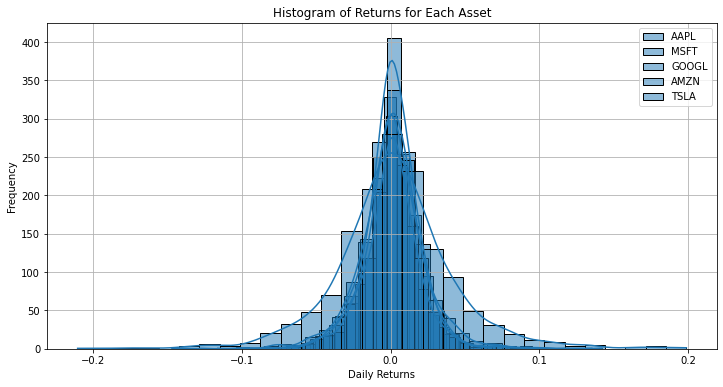

In [18]:
# Histogram of Returns for Each Asset
plt.figure(figsize=(12, 6))
for symbol in portfolio_symbols:
    sns.histplot(portfolio_returns[symbol], bins=30, kde=True, label=symbol)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Histogram of Returns for Each Asset")
plt.legend()

# Save the plot as an image
plt.savefig('./Images/HistogramReturns')

plt.grid(True)

**Histogram of Returns for Each Asset:** These histograms show the distribution of daily returns for each asset in the portfolio. You can assess the shape and spread of return distributions and identify potential outliers.

**Return Distribution:** Each histogram represents the distribution of daily returns for a specific asset in your portfolio. The x-axis (horizontal) shows the range of returns, and the y-axis (vertical) shows the frequency or count of occurrences for each return value.

**Return Spread:** The width and shape of each histogram indicate the spread and shape of the asset's returns. A wider spread suggests greater return variability, while a narrower spread suggests more stable returns.

**Central Tendency:** The peak or mode of each histogram represents the asset's central tendency in terms of returns. A higher peak suggests that returns are concentrated around a specific value, while a flatter distribution indicates more variability.

**Skewness:** The asymmetry of the histogram can indicate skewness in the return distribution. A positive skew (long tail to the right) suggests that there may be occasional large positive returns, while a negative skew (long tail to the left) suggests occasional large negative returns.

**Kurtosis:** The shape of the distribution can provide insights into kurtosis, which measures the tail risk. A leptokurtic distribution (higher peak and fatter tails) implies a higher likelihood of extreme returns, both positive and negative.

**Outliers:** The presence of outliers (extreme values) in the tails of the distribution can be observed. Outliers can significantly impact portfolio performance and risk.

**Asset Comparison:** By comparing the histograms of different assets, you can assess their risk-return profiles. Assets with wider or more skewed distributions may have higher risk.

**Normality Assessment:** You can visually assess whether the return distributions appear to follow a normal (bell-shaped) distribution. Deviations from normality can impact the accuracy of traditional statistical models.

**Diversification Insights:** Diversification benefits are often realized when assets have different return distributions. If the histograms of your assets vary significantly, it suggests potential diversification benefits.

**Risk Assessment:** Understanding the distribution of returns is crucial for risk management and portfolio optimization. It helps you quantify potential losses and make informed risk-adjusted decisions.

Overall, the "Histogram of Returns for Each Asset" plot allows you to assess the risk and return characteristics of individual assets within your portfolio. It aids in understanding the distribution of returns, identifying outliers, and making informed investment decisions based on the risk-return profiles of each asset.

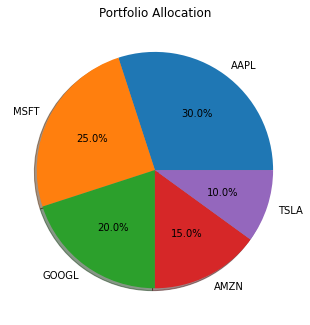

In [19]:
# Portfolio Allocation Pie Chart
plt.figure(figsize=(25, 25)) 
plt.subplot(4, 2, 6)
labels = portfolio_symbols
sizes = custom_weights
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Portfolio Allocation")

# Save the plot as an image
plt.savefig('./Images/PortfolioAllocation')


**Portfolio Allocation Pie Chart:** This pie chart illustrates the allocation of the portfolio across different assets. It helps you understand the composition of the portfolio and how assets are distributed based on custom weights. Each slice of the pie chart represents a different asset in your portfolio, and the size of each slice is proportional to the allocation or weight of that asset in the portfolio. You can visually see which assets have the largest and smallest allocations in your portfolio. This helps you understand which assets play a significant role in determining your portfolio's overall performance.

**Diversification Assessment:** Diversification is a key principle of portfolio management. The pie chart allows you to assess whether your portfolio is well-diversified. A well-diversified portfolio typically has allocations spread across different assets, reducing the impact of individual asset performance on the overall portfolio.

**Risk and Return Considerations:** The allocation of assets can impact both the risk and return of your portfolio. Assets with higher allocations will have a more significant influence on your portfolio's performance. This visualization can help you evaluate how asset allocation choices align with your risk and return objectives.

**Rebalancing Insights:** Over time, the allocation of your portfolio may drift from your target weights due to asset price movements. The pie chart can serve as a reference for rebalancing your portfolio to bring it back in line with your desired allocation.

**Communication Tool:** If you are discussing your portfolio with others, the pie chart provides a clear and intuitive way to communicate the composition of your investments.

**Decision Making:** When considering changes to your portfolio, this chart can guide your decision-making process by highlighting the current allocation of assets.

**Asset Concentration:** The pie chart allows you to identify whether your portfolio is concentrated in a few assets or spread across a broader range. Concentration can impact diversification and risk.

**Asset Class Representation:** If your portfolio spans different asset classes (e.g., stocks, bonds, real estate), the pie chart shows the representation of each asset class.

**Tracking Changes:** Over time, you can create multiple pie charts to track how your portfolio allocation evolves. This helps you assess whether your investment strategy is aligned with your long-term goals.

Overall, the "Portfolio Allocation Pie Chart" is a valuable visualization for understanding how your investments are distributed among different assets or asset classes. It provides insights into diversification, risk, and the composition of your portfolio, aiding in informed investment decisions and portfolio management.